# I Deriving PCA from the SVD  

This homework problem will highlight the relationship between singular value decomposition and principal component analysis.
<br>
1. Implement principal component analysis for an arbitrary dataset: you may use an implementation of the singular value decomposition.
<br>
2. Using the ovarian_cancer.csv dataset from the last homework, apply your implementation of PCA. Plot singular values and plot the fraction of variance corresponding to each singular value. 
<br>
3. Find the two first principal components. Note that the ith principal component is calculated by:
$$u_{i} = \text{argmax}_{\|u_{i}\| = 1} u_{i}^{\top}\mathbf{B}^{\top}\mathbf{B}u_{i}$$
where $\mathbf{B}$ is the covariance matrix of the our observations $\mathbf{X}$.
<br>
Plot the reduced data projection onto the first two principal components. Color data points by their status (cancer vs normal).

In [1]:
### Question 1 ###
# Import package
import numpy as np
def PCA(X):
    # (1) Compute the mean of each row:
    x_bar = X.mean(axis = 1)
    # (1.1) Construct the average matrix
    X_bar = x_bar*np.ones((1, X.shape[1]))
    # (2) Subtract mean from data
    B = X - X_bar
    # Method 2: (3) Perform SVD decomposition on matrix B 
    U, S, VT = np.linalg.svd(B, full_matrices = False)
    # Use the singular values from S to construct a diag matrix S
    S = np.diag(S)
    # (4) Construct principle component matrix
    T = np.matmul(U,S)
    # Return principle component matrix T and Sigma from SVD decomposition
    return T, S

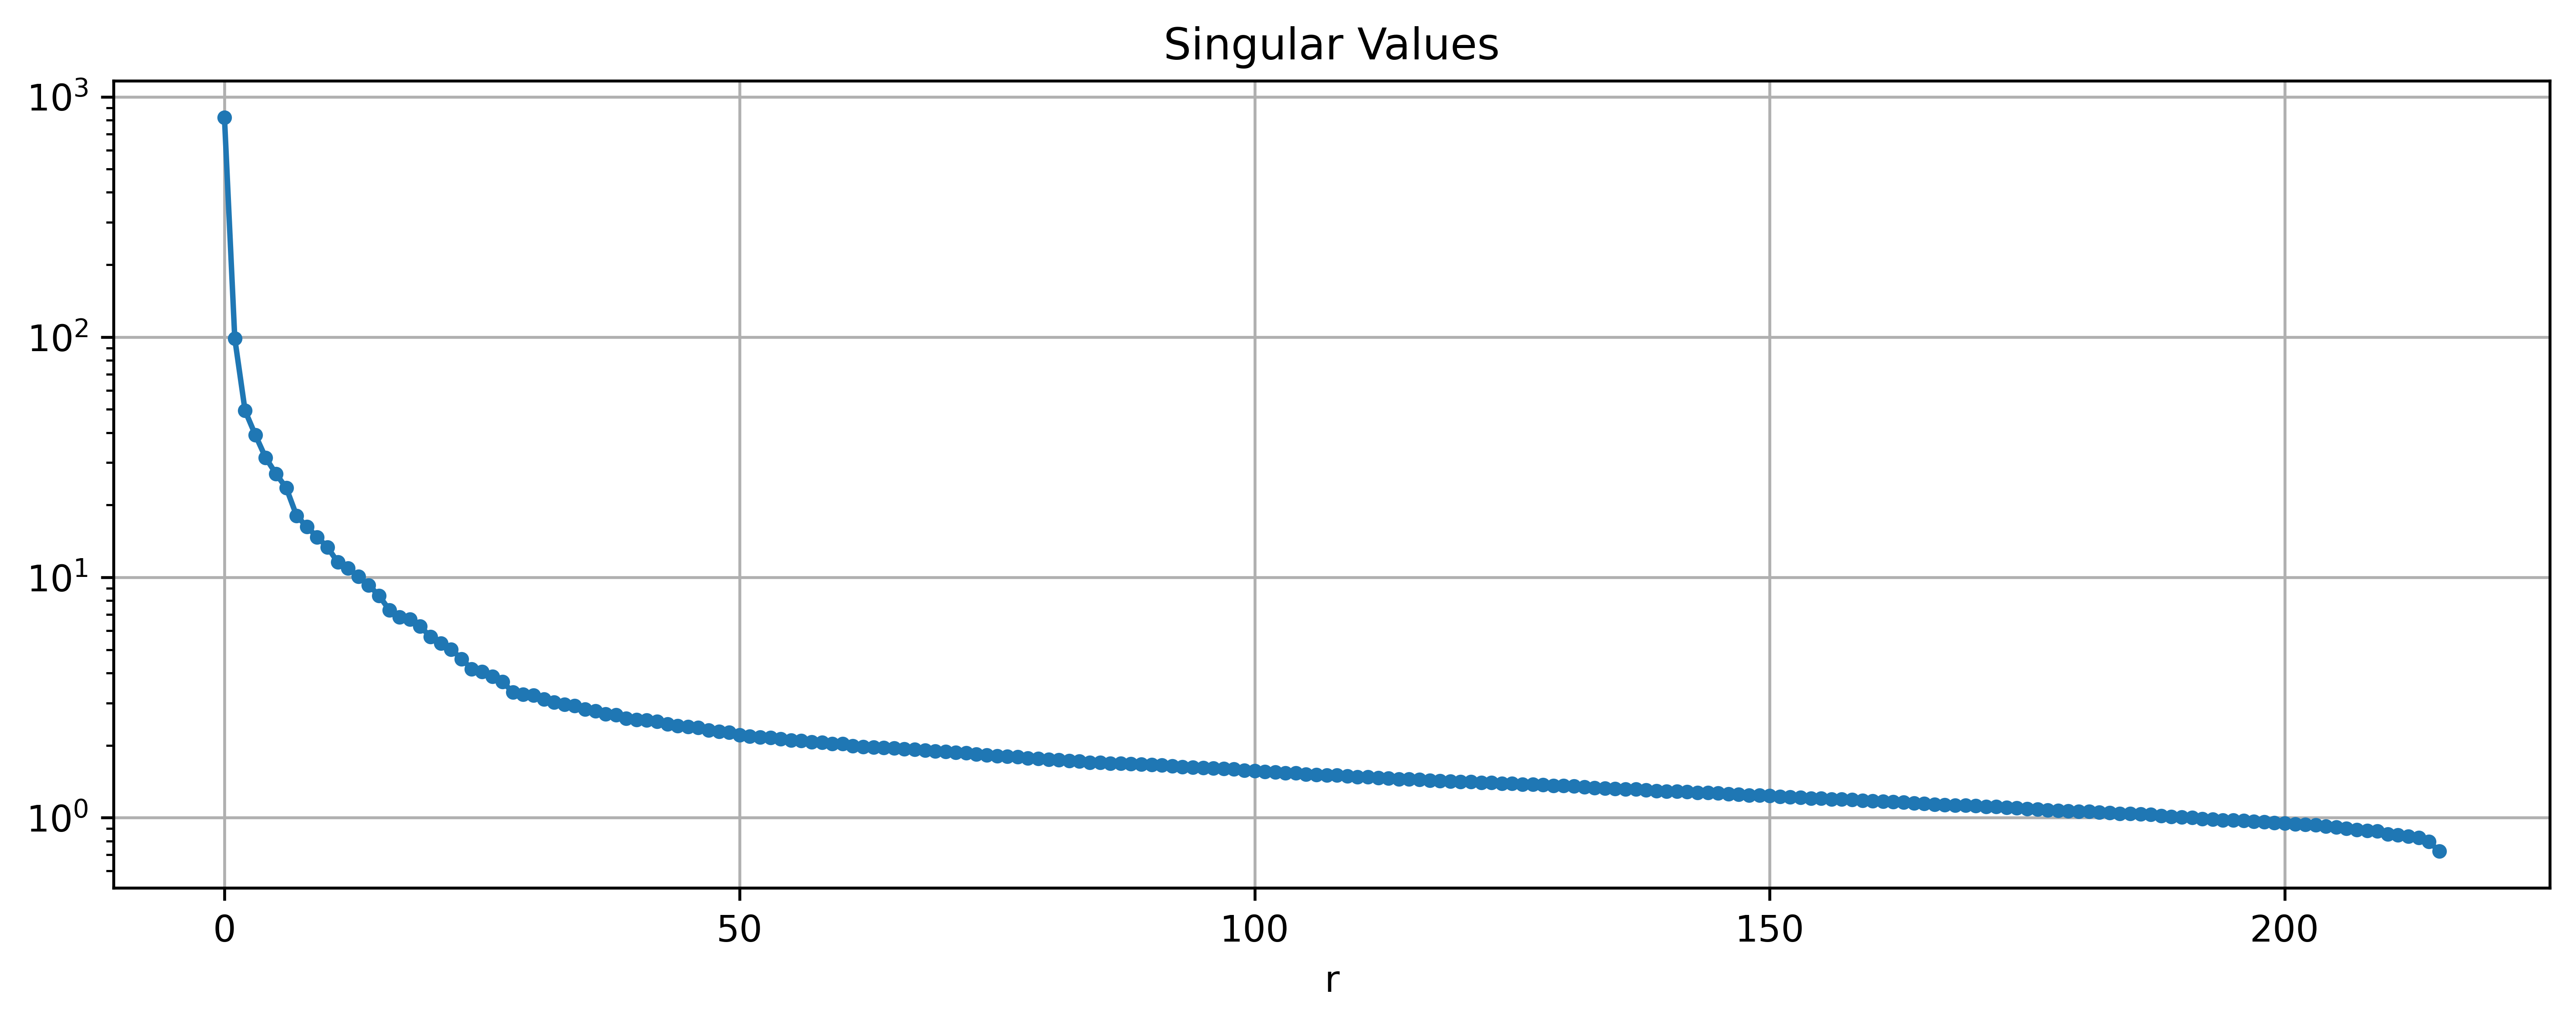

In [2]:
### Question 2 ###
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load data
data = pd.read_csv('ovarian_cancer.csv')
# Drop non-numeric columns
df = data.drop(columns = ['status', 'patients'])
# Transform data to numpy matrix
df = np.mat(df)
# Perform PCA
T, S = PCA(df)
# Plot singular values
plt.figure(figsize = (12, 4), dpi = 600)
plt.semilogy(np.diag(S), '.-')
plt.title('Singular Values')
plt.xlabel('r')
plt.grid()

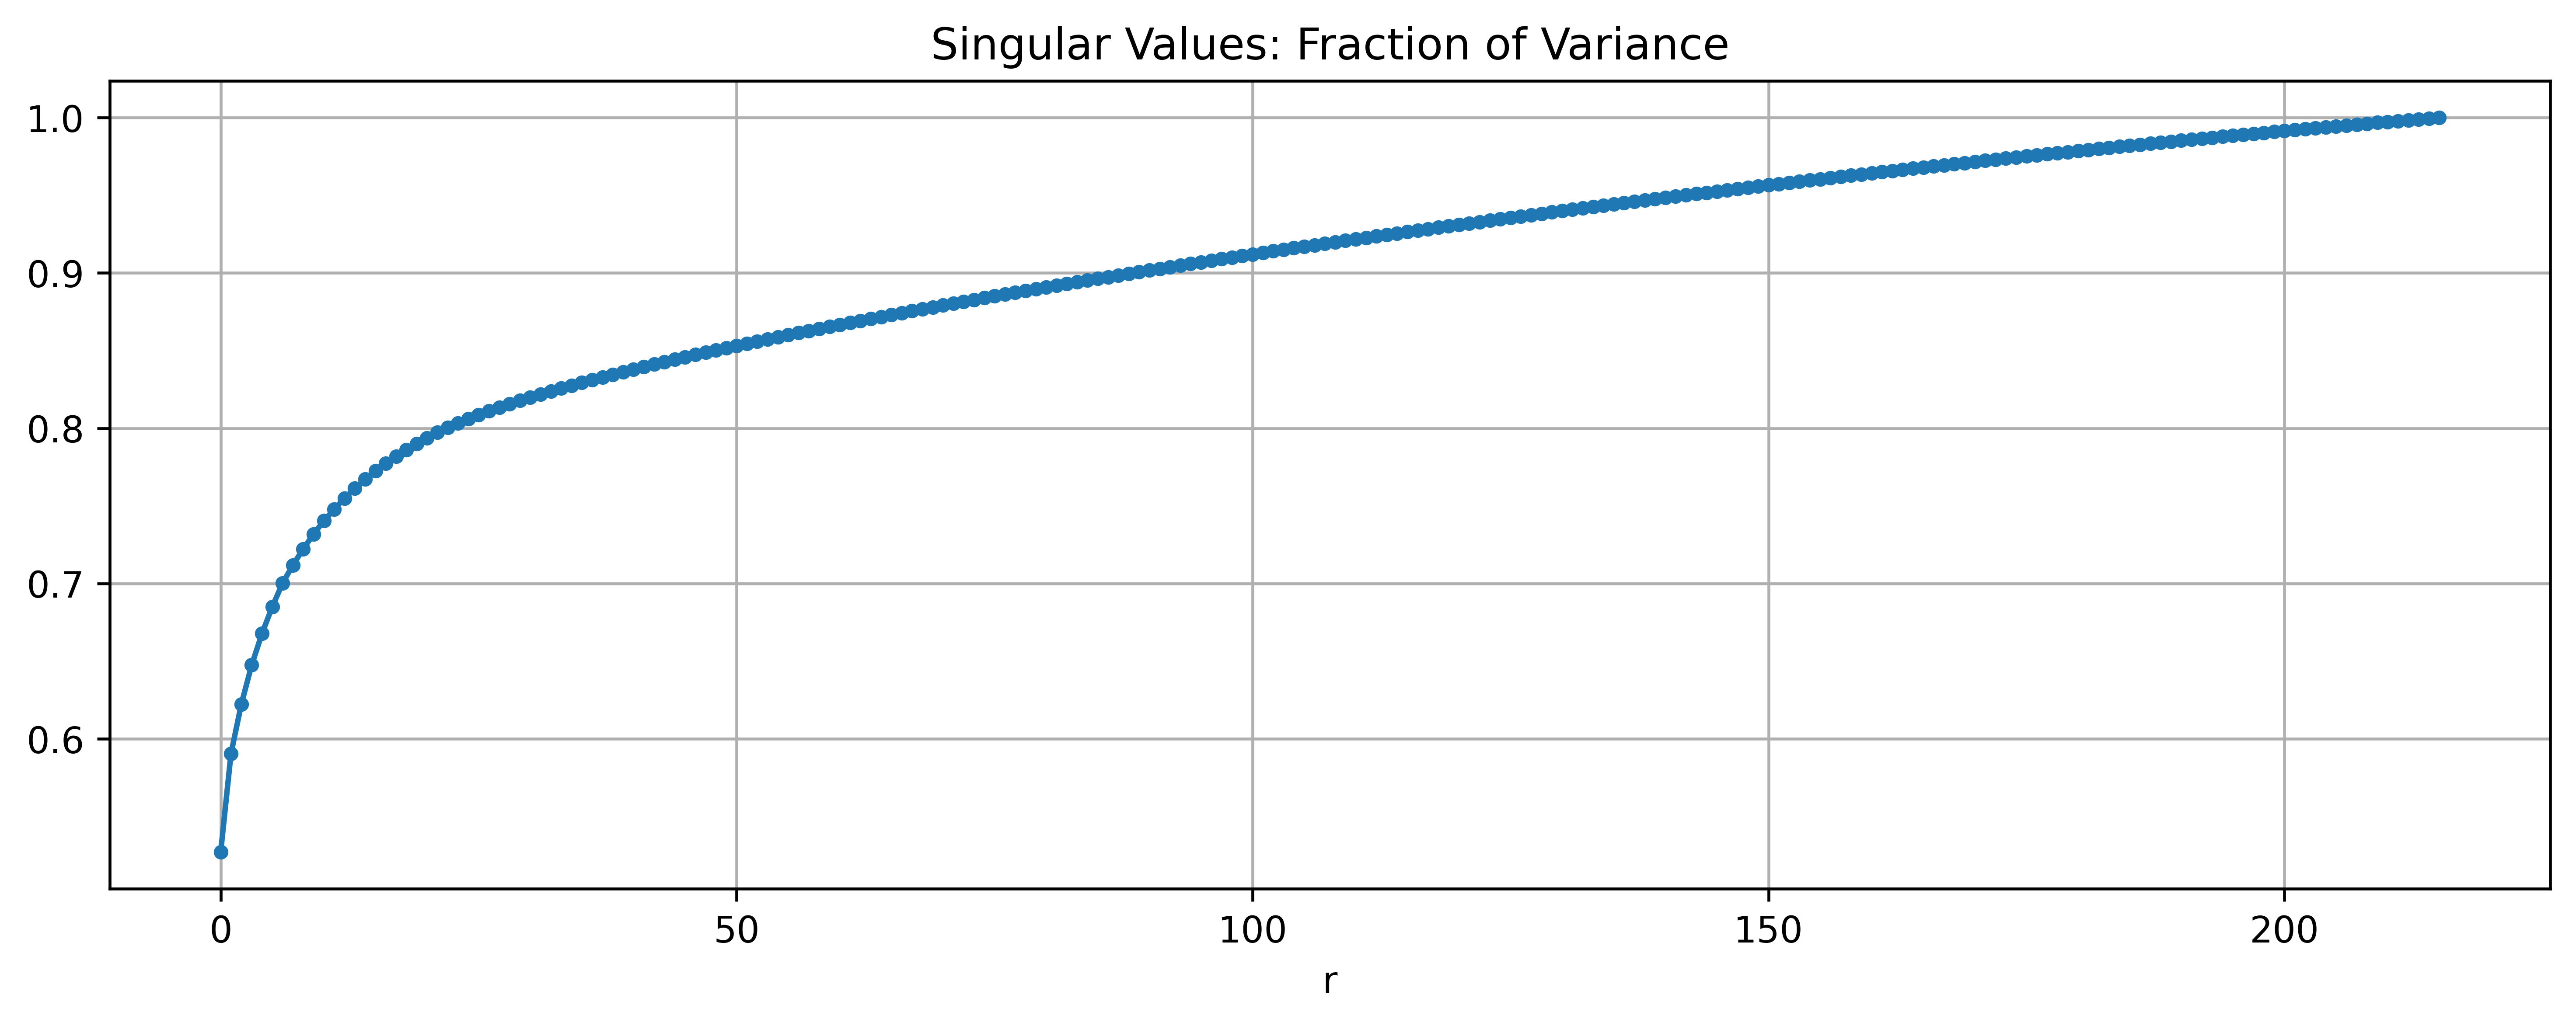

In [3]:
# Plot the fraction of variance corresponding to each singular value
plt.figure(figsize = (12, 4), dpi = 600)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)), '.-')
plt.title('Singular Values: Fraction of Variance')
plt.xlabel('r')
plt.grid()
plt.show()

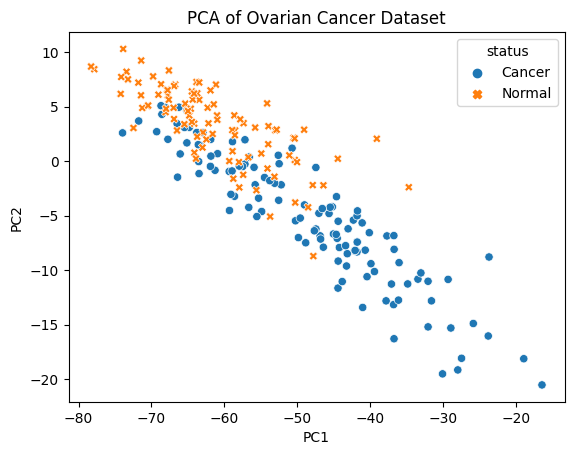

In [4]:
### Question 3 ###
# Trasform PC matrix to a Data Frame for easier plotting
T = pd.DataFrame(T)
# Add non-numeric columns
T = pd.concat([data[['status', 'patients']], T], axis = 1)
sns.scatterplot(data = T, x = 0, y = 1, hue = 'status', style = 'status').set(title = 'PCA of Ovarian Cancer Dataset',
                                                                              xlabel = 'PC1',
                                                                              ylabel = 'PC2')
plt.show()

# II Signal decomposition.  

In this problem, we aim to recover unobserved signal sources from observed signal mixtures, exploiting only the assumption that there exists mutual independence between unobserved signal sources. Signal separation has applications in sound engineering, telecommunication, neuroscience and many other areas of science and engineering. 
<br>
1. Download mixed_signals.csv from Canvas.  The rows represent time and the columns correspond to an observed signal mixture. Plot each signal over time.
<br>
2. Recover unobserved source signals from observed mixed signals.  You may use methods such as ICA, PCA, and other dimensionality reduction algorithms.  Plot recovered source signals over time. Compare other results to PCA and discuss. 
<br>
3.  Write down the equations for each of the recovered source signals.  These are known mathematical functions. 

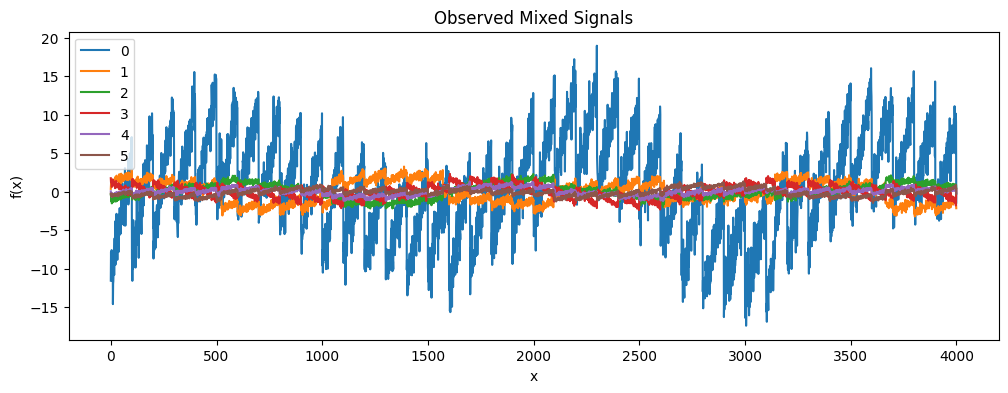

In [5]:
### Question 1 ###
# Load data
df = pd.read_csv('mixed_signals.csv')
# Drop former index column
df.drop(columns = ['Unnamed: 0'],inplace = True)
# Plot data
df.plot(figsize = (12, 4))
# Plot config
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Observed Mixed Signals')
plt.show()

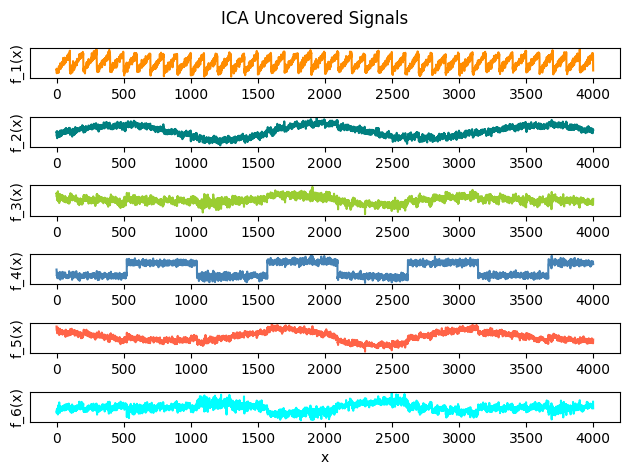

In [6]:
### Question 2 ###
# Import packages
from sklearn.decomposition import FastICA
import warnings
warnings.filterwarnings('ignore')
# Create FastICA object
ICA = FastICA(tol = 1e-12, max_iter = 1000)
# Implement ICA
ICA_signals = ICA.fit_transform(df)
# Plot data
colors = ['darkorange', 'teal', 'yellowgreen', 'steelblue', 'tomato', 'cyan']
for i in range(6):
    plt.subplot(6, 1, i+1)
    plt.plot(ICA_signals[:,i], color = colors[i])
    # Plot config
    plt.ylabel(f'f_{i+1}(x)')
    plt.yticks([])
# Plot config cont.
plt.xlabel('x')
plt.suptitle('ICA Uncovered Signals')
plt.tight_layout()
plt.show()

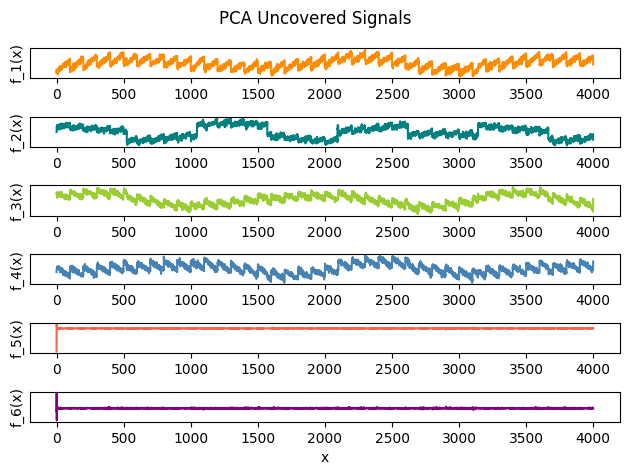

In [7]:
# Transform data to numpy matrix
dfNew = np.mat(df)
# Implement PCA
PCA_signals, S = PCA(dfNew)
# Plot data
colors = ['darkorange', 'teal', 'yellowgreen', 'steelblue', 'tomato', 'purple', 'cyan']
for i in range(6):
    plt.subplot(6, 1, i+1)
    plt.plot(PCA_signals[:,i], color = colors[i])
    # Plot config
    plt.ylabel(f'f_{i+1}(x)')
    plt.yticks([])
# Plot config cont.
plt.xlabel('x')
plt.suptitle('PCA Uncovered Signals')
plt.tight_layout()
plt.show()

3. **Answer:** The order is randomized each run, but the functions are: (1) sine wave, (2) square wave, (3) cosine wave, and (4) saw-tooth wave. All other signals are noise/garbage.